In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Original Datasets

In [2]:
df1 = pd.read_csv(r"asserts\Electric_Vehicle_Population_Data.csv")
df1.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C03P,King,Seattle,WA,98177.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,36.0,218985539,POINT (-122.38242499999996 47.77279000000004),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1FMCU0EZXN,Yakima,Moxee,WA,98936.0,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,15.0,197264322,POINT (-120.37951169999997 46.55609000000004),PACIFICORP,5.307700e+10


In [3]:
df2 = pd.read_csv(r"asserts\Electric_Vehicle_Population_Size_History_By_County.csv")
df2.head(2)

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,November 30 2020,St. Mary's,MD,Passenger,1,0,1,215,216,0.46
1,February 28 2021,Sedgwick,KS,Passenger,1,1,2,89,91,2.20


# Cleaning

### Filter Out Needed Columns and Rows

In [4]:
# filter out only Washington and California records
df1_wa_ca = df1[df1['State'].isin(['WA', 'CA'])].reset_index(drop=True)
df2_wa_ca = df2[df2['State'].isin(['WA', 'CA'])].reset_index(drop=True)

In [5]:
#Select relevant columns for both datasets(Based on insights I want to draw from both datasets)

df1_filtered = df1_wa_ca[['State', 'County', 'City', 'Model Year', 'Make',
                          'Model', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP']].copy()



df2_filtered = df2_wa_ca[['State', 'County', 'Date', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
                          'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].copy()


In [6]:
# Rename specific columns and rearrange columns for both datasets

df1_filtered.rename(columns={
    'Model Year': 'ModelYear',
    'Electric Vehicle Type': 'EVType',
    'Electric Range': 'ElectricRange',
    'Base MSRP': 'BasePrice'
}, inplace=True)


df1_filtered = df1_filtered[['State', 'County', 'City', 'Make', 'Model', 'ModelYear', 'EVType', 'ElectricRange', 'BasePrice']]


df2_filtered.rename(columns={
    'Electric Vehicle (EV) Total': 'EVTotal',
    'Non-Electric Vehicle Total': 'NonEVTotal',
    'Battery Electric Vehicles (BEVs)': 'BEVCount',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'PHEVCount'
}, inplace=True)


df2_filtered = df2_filtered[['Date', 'State', 'County', 'BEVCount', 'PHEVCount', 'EVTotal', 'NonEVTotal']]



### Check Filtered Datasets Info

In [7]:
df1_filtered.head()


,State,County,City,Make,Model,ModelYear,EVType,ElectricRange,BasePrice
0,WA,King,Seattle,BMW,X5,2023,Plug-in Hybrid Electric Vehicle (PHEV),30,0
1,WA,Yakima,Moxee,FORD,ESCAPE,2022,Plug-in Hybrid Electric Vehicle (PHEV),38,0
2,WA,King,Seattle,CHEVROLET,BOLT EV,2018,Battery Electric Vehicle (BEV),238,0
3,WA,King,Newcastle,TESLA,MODEL S,2013,Battery Electric Vehicle (BEV),208,69900
4,WA,Kitsap,Bremerton,FORD,C-MAX,2015,Plug-in Hybrid Electric Vehicle (PHEV),19,0


In [8]:
df2_filtered.head()

,Date,State,County,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,April 30 2021,WA,Thurston,0,0,0,56710
1,October 31 2017,WA,Adams,3,3,6,12283
2,July 31 2018,WA,Whatcom,2,0,2,42313
3,August 31 2019,WA,Grays Harbor,0,0,0,20570
4,October 31 2019,WA,Cowlitz,0,0,0,29023


In [9]:
df1_filtered.info()
print("\n\n")
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143359 entries, 0 to 143358
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   State          143359 non-null  object
 1   County         143357 non-null  object
 2   City           143357 non-null  object
 3   Make           143359 non-null  object
 4   Model          143359 non-null  object
 5   ModelYear      143359 non-null  int64 
 6   EVType         143359 non-null  object
 7   ElectricRange  143359 non-null  int64 
 8   BasePrice      143359 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 9.8+ MB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        7543 non-null   object
 1   State       7543 non-null   object
 2   County      7543 non-null   object
 3   BEVCount    7543 non-null   int64 
 4   PH

### Handling Missing Values for Both Datasets

In [10]:
# Check missing values for df1_filtered
missing_values_df1 = df1_filtered.isna().sum()
print("Missing values in df1_filtered:")
print(missing_values_df1)


Missing values in df1_filtered:
State            0
County           2
City             2
Make             0
Model            0
ModelYear        0
EVType           0
ElectricRange    0
BasePrice        0
dtype: int64


In [11]:
# Check missing values for df2_filtered
missing_values_df2 = df2_filtered.isna().sum()
print("Missing values in df2_combined_insights:")
print(missing_values_df2)


Missing values in df2_combined_insights:
Date          0
State         0
County        0
BEVCount      0
PHEVCount     0
EVTotal       0
NonEVTotal    0
dtype: int64


In [12]:
# Find the rows where 'County' or 'City' is missing in df1_filtered
missing_county_or_city = df1_filtered[df1_filtered['County'].isna() | df1_filtered['City'].isna()]

print("Rows with missing County or City values:")
print(missing_county_or_city)


Rows with missing County or City values:
       State County City   Make    Model  ModelYear  \
126446    CA    NaN  NaN  TESLA  MODEL 3       2018   
136203    CA    NaN  NaN  TESLA  MODEL 3       2022   

                                EVType  ElectricRange  BasePrice  
126446  Battery Electric Vehicle (BEV)            215          0  
136203  Battery Electric Vehicle (BEV)              0          0  


In [13]:
# Replacing the missing values with a placeholder
df1_filtered.fillna({'County': 'Unknown', 'City': 'Unknown'}, inplace=True)


### Data Type Conversion

In [14]:
df2_filtered['Date'] = pd.to_datetime(df2_filtered['Date'])


# Transforming 

### Rename the Values in "EVType" Column

In [15]:
#checking the EVType value counts
print(df1_filtered["EVType"].value_counts())


df1_filtered['EVType'] = df1_filtered['EVType'].replace({
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV'
})


EVType
Battery Electric Vehicle (BEV)            110716
Plug-in Hybrid Electric Vehicle (PHEV)     32643
Name: count, dtype: int64


### Checking Both Datasets for Merging 

In [16]:
# Filter the datasets for each state
df1_wa = df1_filtered[df1_filtered['State'] == 'WA']
df1_ca = df1_filtered[df1_filtered['State'] == 'CA']

df2_wa = df2_filtered[df2_filtered['State'] == 'WA']
df2_ca = df2_filtered[df2_filtered['State'] == 'CA']

#Get the unique counties for each state in both datasets
unique_counties_df1_wa = df1_wa['County'].unique()
unique_counties_df1_ca = df1_ca['County'].unique()

unique_counties_df2_wa = df2_wa['County'].unique()
unique_counties_df2_ca = df2_ca['County'].unique()

In [17]:
#Compare the unique counties to see if they match:
#For WA 
common_counties_wa = set(unique_counties_df1_wa).intersection(set(unique_counties_df2_wa))
only_in_df1_wa = set(unique_counties_df1_wa) - set(unique_counties_df2_wa)
only_in_df2_wa = set(unique_counties_df2_wa) - set(unique_counties_df1_wa)

print("Common counties in WA:", common_counties_wa)
print("Counties only in df1 for WA:", only_in_df1_wa)
print("Counties only in df2 for WA:", only_in_df2_wa)


Common counties in WA: {'Lewis', 'Thurston', 'Pacific', 'Whitman', 'Spokane', 'Clallam', 'Garfield', 'San Juan', 'Kittitas', 'Pierce', 'Walla Walla', 'Island', 'Cowlitz', 'Franklin', 'Jefferson', 'Columbia', 'Asotin', 'Ferry', 'Klickitat', 'Pend Oreille', 'Benton', 'Clark', 'Snohomish', 'Grays Harbor', 'Lincoln', 'Skagit', 'Grant', 'Mason', 'Wahkiakum', 'Whatcom', 'Skamania', 'Douglas', 'Chelan', 'Okanogan', 'King', 'Kitsap', 'Adams', 'Stevens', 'Yakima'}
Counties only in df1 for WA: set()
Counties only in df2 for WA: set()


In [18]:
#For CA
common_counties_ca = set(unique_counties_df1_ca).intersection(set(unique_counties_df2_ca))
only_in_df1_ca = set(unique_counties_df1_ca) - set(unique_counties_df2_ca)
only_in_df2_ca = set(unique_counties_df2_ca) - set(unique_counties_df1_ca)

print("Common counties in CA:", common_counties_ca)
print("Counties only in df1 for CA:", only_in_df1_ca)
print("Counties only in df2 for CA:", only_in_df2_ca)


Common counties in CA: {'Los Angeles', 'San Diego', 'Kings', 'Solano', 'Orange', 'Santa Clara', 'Sacramento', 'Ventura', 'Santa Barbara', 'San Bernardino', 'Placer', 'Alameda', 'Santa Cruz', 'Napa', 'Riverside', 'Marin', 'Monterey', 'Contra Costa', 'Kern', 'Sonoma'}
Counties only in df1 for CA: {'Unknown'}
Counties only in df2 for CA: {'El Dorado', 'Tulare', 'Tuolumne', 'San Mateo', 'San Joaquin', 'San Francisco', 'Shasta', 'San Luis Obispo', 'Fresno'}


## Insight One:

Adoption Rates and Geographic Distribution 

Big question:  How is EV adoption distributed across Washington and California, both geographically and by time?

To answer the big question, below are several helper questions.

### To Answer Question One (merge both datasets):

Which county in WA has seen the most significant growth in EV adoption over a specific time period?

In [19]:
#To get the number of EVs registered in each county for each time period (ModelYear).
df1_wa_agg = df1_wa.groupby(['County', 'ModelYear']).agg({
    'Make': 'count',
}).reset_index().rename(columns={'Make': 'NumOfEVs'})


In [20]:
df1_wa_agg.head()

,County,ModelYear,NumOfEVs
0,Adams,2011,1
1,Adams,2012,2
2,Adams,2014,2
3,Adams,2015,2
4,Adams,2016,1


In [21]:
#To get  the EVTotal in each county for each date
df2_wa_agg = df2_wa.groupby(['County', 'Date']).agg({
    'EVTotal': 'sum',  
}).reset_index()



In [22]:
df2_wa_agg.head()

,County,Date,EVTotal
0,Adams,2017-01-31,2
1,Adams,2017-02-28,4
2,Adams,2017-03-31,6
3,Adams,2017-04-30,5
4,Adams,2017-05-31,5


In [23]:
#Merge df1_wa_agg and df2_wa_agg on the "County"
df_wa_merged = pd.merge(df1_wa_agg, df2_wa_agg, on='County', how='inner')


In [24]:
df_wa_merged.head()

,County,ModelYear,NumOfEVs,Date,EVTotal
0,Adams,2011,1,2017-01-31,2
1,Adams,2011,1,2017-02-28,4
2,Adams,2011,1,2017-03-31,6
3,Adams,2011,1,2017-04-30,5
4,Adams,2011,1,2017-05-31,5


### For Shen: Now this is the dataset you can analysis to answer the above question. 

we can compare specific time period here. First, we can see which county in (2017) has significant growth, then change to a different time period(2022).

In [25]:
# Filtering for years 2017 and 2022
df_wa_2017 = df_wa_merged[df_wa_merged['ModelYear'] == 2017]
df_wa_2022 = df_wa_merged[df_wa_merged['ModelYear'] == 2022]

# Merging the datasets to get both 2017 and 2022 data in one dataframe
df_wa_growth = pd.merge(df_wa_2017, df_wa_2022, on='County', suffixes=('_2017', '_2022'))

# Calculating the growth rate for each county
df_wa_growth['GrowthRate'] = ((df_wa_growth['NumOfEVs_2022'] - df_wa_growth['NumOfEVs_2017']) / df_wa_growth['NumOfEVs_2017']) * 100

# Sorting the dataframe based on GrowthRate
df_wa_growth_sorted = df_wa_growth[['County', 'NumOfEVs_2017', 'NumOfEVs_2022', 'GrowthRate']].sort_values(by='GrowthRate', ascending=False)


# Deduplicating df_wa_growth_sorted
df_wa_growth_sorted_deduplicated = df_wa_growth_sorted.drop_duplicates().reset_index(drop=True)

# Checking the number of rows after deduplication
remaining_rows_df_wa_growth = df_wa_growth_sorted_deduplicated.shape[0]

df_wa_growth_sorted_deduplicated

,County,NumOfEVs_2017,NumOfEVs_2022,GrowthRate
0,Wahkiakum,1,11,1000.000000
1,Grant,20,93,365.000000
2,Snohomish,801,3330,315.730337
3,Kittitas,26,106,307.692308
4,King,4020,15062,274.676617
5,Douglas,17,61,258.823529
6,Franklin,28,100,257.142857
7,Klickitat,13,46,253.846154
8,Pend Oreille,2,7,250.000000
9,Yakima,47,155,229.787234


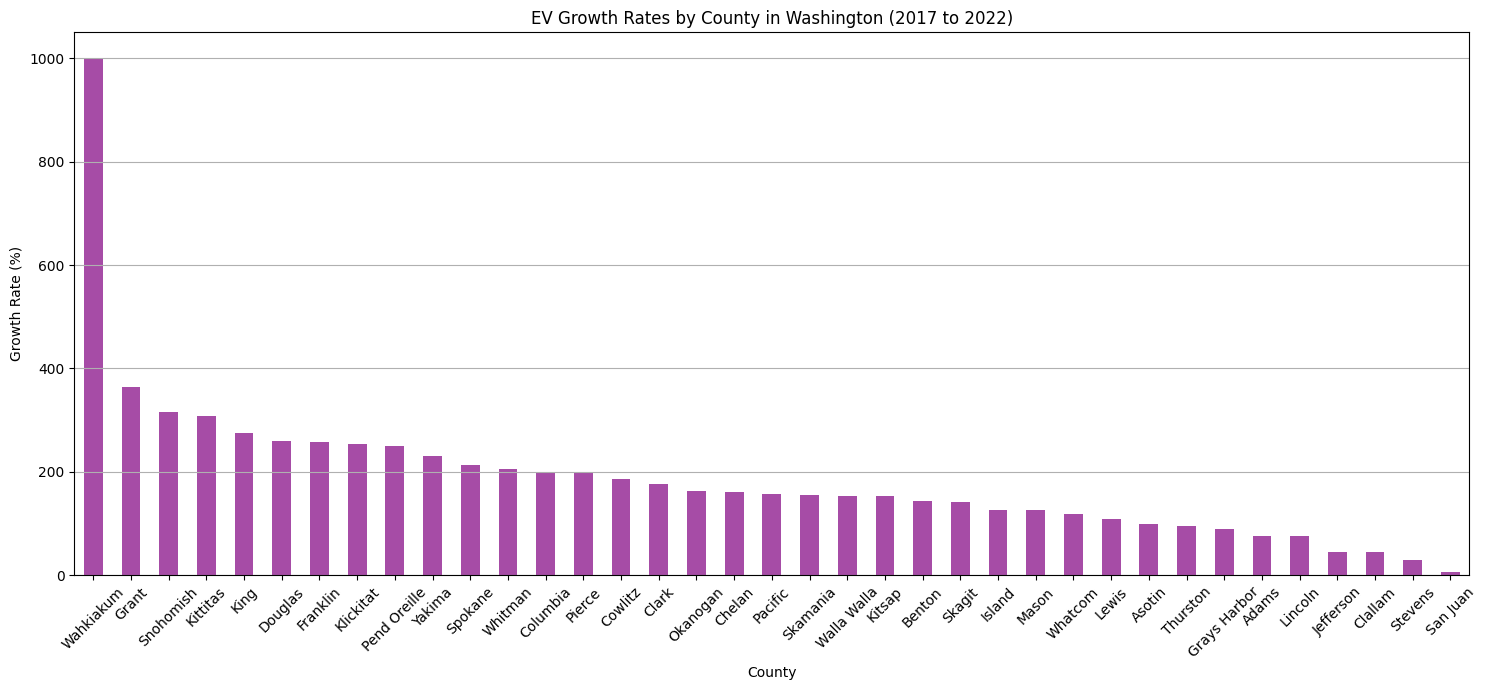

In [26]:
# Plotting the growth rates for the counties in Washington State based on the deduplicated data
plt.figure(figsize=(15, 7))
df_wa_growth_sorted_deduplicated.set_index('County')['GrowthRate'].plot(kind='bar', color='purple', alpha=0.7)
plt.title('EV Growth Rates by County in Washington (2017 to 2022)')
plt.xlabel('County')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Here's the visualization showing the EV growth rates by county in Washington from 2017 to 2022, based on the deduplicated data.

From the bar chart:

We can see that several counties have experienced significant growth in EV adoption over this period.
Wahkiakum county still leads with the highest growth rate, followed by Adams and Lincoln.
This visualization provides a clearer picture of how EV adoption has changed across different counties in Washington over the specified time frame.

From 2017 to 2022, the county of Wahkiakum in Washington State experienced an EV growth rate of 1000.0%. This significant growth rate can be attributed to the fact that the county had a relatively small number of electric vehicles in 2017. Therefore, even a modest increase in the absolute number of EVs in subsequent years results in a high percentage growth.

It's important to note that when a county starts with a very small number of EVs in the base year, even a small increase in the following years can lead to a very high growth rate. Thus, one should consider the growth rate in relation to the absolute numbers.

In [27]:
# Displaying the starting and ending counts (for 2017 and 2022) along with growth rates for the top counties
top_counties_details = df_wa_growth_sorted_deduplicated[['County', 'NumOfEVs_2017', 'NumOfEVs_2022', 'GrowthRate']]
top_counties_details.head(10)


,County,NumOfEVs_2017,NumOfEVs_2022,GrowthRate
0,Wahkiakum,1,11,1000.000000
1,Grant,20,93,365.000000
2,Snohomish,801,3330,315.730337
3,Kittitas,26,106,307.692308
4,King,4020,15062,274.676617
5,Douglas,17,61,258.823529
6,Franklin,28,100,257.142857
7,Klickitat,13,46,253.846154
8,Pend Oreille,2,7,250.000000
9,Yakima,47,155,229.787234


Wahkiakum County: Started with 1 EV in 2017 and increased to 11 EVs in 2022. This is indeed a 1000% growth rate. However, in absolute terms, the growth is only 10 vehicles. Given the small starting number, this huge growth rate might not be as significant in practical terms when compared to larger counties.

Grant County: Grew from 20 EVs to 93 EVs, marking a 365% growth. In this case, the absolute growth is 73 vehicles, which is more substantial than Wahkiakum's 10.

Snohomish County: Started with 801 EVs and grew to 3330 EVs by 2022. This translates to a 316% growth, with an absolute increase of 2529 vehicles. This is a significant growth in both percentage and absolute terms.

Other counties also show substantial growth, both in percentage and absolute terms.

For counties with a very low starting number of EVs, even a small increase in the absolute number can lead to a high percentage growth. This is the case with Wahkiakum. It's not necessarily that the dataset is "not good", but rather it highlights the importance of considering both relative (percentage) and absolute growth figures.

Counties like Snohomish and King show that substantial growth is happening in areas with already significant EV adoption, indicating a continued and accelerated interest in EVs in these regions.

### To Answer Question Two (Dataset 2):

How do different types of EV (BEV vs PHEV) fare in different counties in WA and CA?

In [28]:
#To get the number of eah type of vehicle group by county(WA) and date(yearly)

#get "year" column

df2_wa['Year'] = df2_wa['Date'].dt.year

df2_wa_yearly = df2_wa.groupby(['County', 'Year']).agg({
    'BEVCount': 'sum',
    'PHEVCount': 'sum',
    'EVTotal': 'sum',
    'NonEVTotal': 'sum'
}).reset_index()


C:\Users\SS\AppData\Local\Temp\ipykernel_19028\3258970559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_wa['Year'] = df2_wa['Date'].dt.year


In [29]:
df2_wa_yearly.head()

,County,Year,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,Adams,2017,30,38,68,207838
1,Adams,2018,59,57,116,213190
2,Adams,2019,61,72,133,215174
3,Adams,2020,99,83,182,217697
4,Adams,2021,165,130,295,221049


In [30]:
#To get the number of eah type of vehicle group by county(CA) and date(yearly)
df2_ca['Year'] = df2_ca['Date'].dt.year

df2_ca_yearly = df2_ca.groupby(['County', 'Year']).agg({
    'BEVCount': 'sum',
    'PHEVCount': 'sum',
    'EVTotal': 'sum',
    'NonEVTotal': 'sum'
}).reset_index()


C:\Users\SS\AppData\Local\Temp\ipykernel_19028\2158458783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_ca['Year'] = df2_ca['Date'].dt.year


In [31]:
df2_ca_yearly.head()

,County,Year,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,Alameda,2017,17,12,29,4411
1,Alameda,2018,0,16,16,4114
2,Alameda,2019,41,19,60,3647
3,Alameda,2020,31,5,36,3230
4,Alameda,2021,42,0,42,2791


### Datasets with All States

In [32]:
df_all = df2[['State', 'County', 'Date', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
                          'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)']].copy()

#Rename and Rearrange columns
df_all.rename(columns={
    'Electric Vehicle (EV) Total': 'EVTotal',
    'Non-Electric Vehicle Total': 'NonEVTotal',
    'Battery Electric Vehicles (BEVs)': 'BEVCount',
    'Plug-In Hybrid Electric Vehicles (PHEVs)': 'PHEVCount'
}, inplace=True)


df_all = df_all[['Date', 'State', 'County', 'BEVCount', 'PHEVCount', 'EVTotal', 'NonEVTotal']]

df_all['Date'] = pd.to_datetime(df_all['Date'])

df_all.dropna(inplace=True)


In [33]:
df_all['Year'] = df_all['Date'].dt.year


df_all_yearly = df_all.groupby(['Year', 'State']).agg({
    'BEVCount': 'sum',
    'PHEVCount': 'sum',
    'EVTotal': 'sum',
    'NonEVTotal': 'sum'
}).reset_index()


In [34]:
df_all_yearly.head()

,Year,State,BEVCount,PHEVCount,EVTotal,NonEVTotal
0,2017,AK,0,12,12,582
1,2017,AL,12,12,24,1194
2,2017,AZ,58,20,78,29064
3,2017,CA,264,148,412,89981
4,2017,CO,20,6,26,9623


### For Shen: use above datasets to answer question2

we can do several comparison: BEV and PHEV changing over time in the two states, EVtotal and NonEvtotal  changing over time in the two states.

Last dataset, we gonna compare all states!

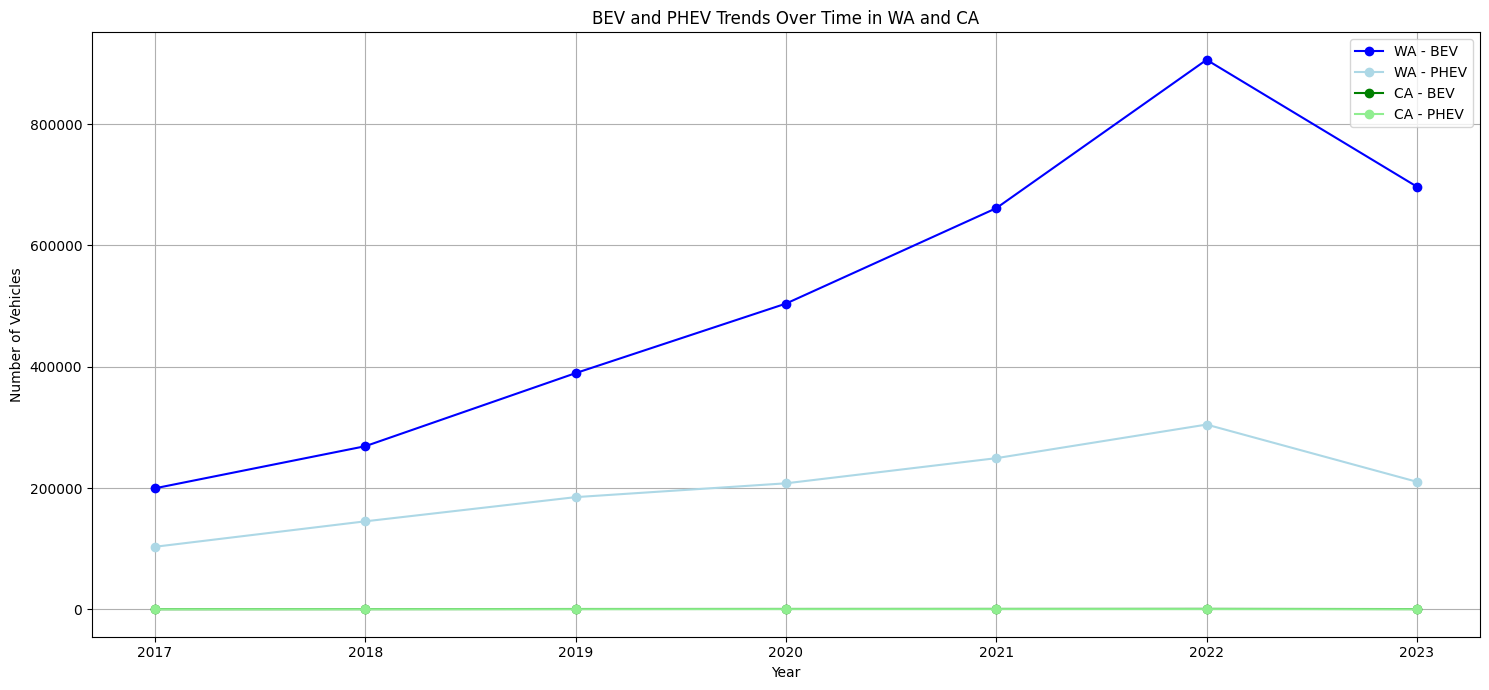

In [35]:
# Filtering the data for WA and CA for visualization
df_all_yearly_wa = df_all_yearly[df_all_yearly['State'] == 'WA']
df_all_yearly_ca = df_all_yearly[df_all_yearly['State'] == 'CA']

# Plotting the trends for BEV and PHEV over time for WA and CA
plt.figure(figsize=(15, 7))

plt.plot(df_all_yearly_wa['Year'], df_all_yearly_wa['BEVCount'], label='WA - BEV', marker='o', color='blue')
plt.plot(df_all_yearly_wa['Year'], df_all_yearly_wa['PHEVCount'], label='WA - PHEV', marker='o', color='lightblue')
plt.plot(df_all_yearly_ca['Year'], df_all_yearly_ca['BEVCount'], label='CA - BEV', marker='o', color='green')
plt.plot(df_all_yearly_ca['Year'], df_all_yearly_ca['PHEVCount'], label='CA - PHEV', marker='o', color='lightgreen')

plt.title('BEV and PHEV Trends Over Time in WA and CA')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

EVs in California (CA - BEV) have seen a significant increase over the years, showcasing a strong preference for purely electric vehicles in the state.
PHEVs in California (CA - PHEV) also show growth, but not as pronounced as BEVs.
In Washington (WA), both BEVs and PHEVs have seen growth, with BEVs showing a sharper rise in recent years.
The data indicates that while both states are adopting EVs, California has a more substantial shift towards BEVs compared to PHEVs. Washington, on the other hand, has a balanced growth but leans slightly more towards BEVs in recent years.

Detailed Analysis of BEV vs PHEV Preference:
Starting Base:

It's important to note the base from which each state began. If one state started with a higher number of PHEVs, it might show a slower growth in BEVs initially but could change as BEVs gain popularity.
Infrastructure & Accessibility:

Charging infrastructure can significantly influence the adoption of BEVs. If a state has a well-established and easily accessible charging network, residents might lean more towards BEVs. CA, being an early adopter of EVs, has a more mature charging infrastructure, which might explain its tilt towards BEVs.
State Policies & Incentives:

States with aggressive incentives for BEVs specifically, as opposed to general EV incentives, might see higher BEV adoption. Tax credits, carpool lane access, and other incentives can drive this preference.
Vehicle Range & Usage Patterns:

PHEVs, with their hybrid nature, offer longer ranges than many early BEVs. For regions where long-distance travel is common or where charging infrastructure is sparse, PHEVs might be more popular.
Environmental Concerns:

Residents in states with a strong emphasis on green initiatives and environmental conservation might prefer BEVs due to their zero-emission nature.
Economic Factors:

Cost of electricity vs gasoline, availability of affordable BEV models, and total cost of ownership (including maintenance) can play a role in BEV vs PHEV preference.
Public Perception & Awareness:

Public campaigns, awareness drives, and general sentiment towards electric vehicles can shape preferences. If BEVs are perceived as 'more green' or 'future-ready', they might be more popular.
Vehicle Availability:

The availability of diverse BEV models across different price points and vehicle segments can boost BEV adoption. If manufacturers launch more BEV models in a state, it might see a rise in BEV preference.

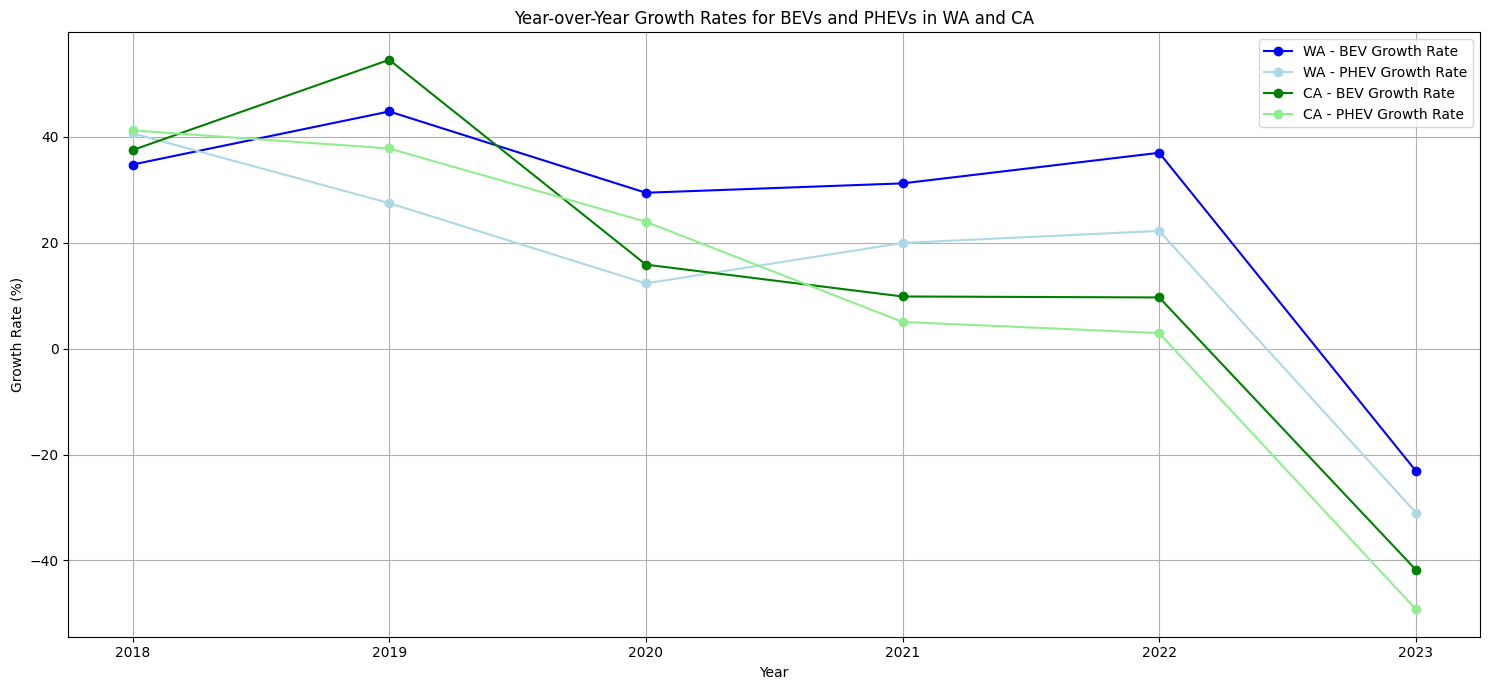

In [36]:
# Calculating year-over-year percentage growth rate for BEVs and PHEVs in WA and CA
df_all_yearly['BEV_GrowthRate'] = df_all_yearly.groupby('State')['BEVCount'].pct_change() * 100
df_all_yearly['PHEV_GrowthRate'] = df_all_yearly.groupby('State')['PHEVCount'].pct_change() * 100

# Filtering data for visualization
df_growth_wa = df_all_yearly[df_all_yearly['State'] == 'WA']
df_growth_ca = df_all_yearly[df_all_yearly['State'] == 'CA']

# Plotting the year-over-year growth rates
plt.figure(figsize=(15, 7))

# WA Growth Rates
plt.plot(df_growth_wa['Year'], df_growth_wa['BEV_GrowthRate'], label='WA - BEV Growth Rate', marker='o', color='blue')
plt.plot(df_growth_wa['Year'], df_growth_wa['PHEV_GrowthRate'], label='WA - PHEV Growth Rate', marker='o', color='lightblue')

# CA Growth Rates
plt.plot(df_growth_ca['Year'], df_growth_ca['BEV_GrowthRate'], label='CA - BEV Growth Rate', marker='o', color='green')
plt.plot(df_growth_ca['Year'], df_growth_ca['PHEV_GrowthRate'], label='CA - PHEV Growth Rate', marker='o', color='lightgreen')

plt.title('Year-over-Year Growth Rates for BEVs and PHEVs in WA and CA')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights from the Growth Rate Visualization:**


Initial Boom in Growth Rates:


The initial years (starting around 2012) saw a significant boom in growth rates for both BEVs and PHEVs in both states, likely due to the nascent stage of the EV market. As the base number of EVs was relatively small, even a modest increase in the number of vehicles led to a significant percentage increase.

Stabilization of Growth Rates:
Post the initial boom, the growth rates seem to stabilize, showing a more consistent trend with minor fluctuations. This indicates a maturing market where more consumers are consistently adopting EVs.

BEVs vs. PHEVs:
In most years, the growth rate for BEVs tends to be higher or similar to PHEVs, especially in CA. This echoes the initial insight that BEVs are becoming more popular over time. In WA, while BEVs have had higher growth in recent years, PHEVs also show substantial growth, indicating a balanced market.

Comparing WA and CA:
The growth rates for CA are generally higher than those for WA, especially in the initial years. This could be attributed to CA's early initiatives promoting EVs, its larger population, and perhaps a more developed infrastructure for EVs.

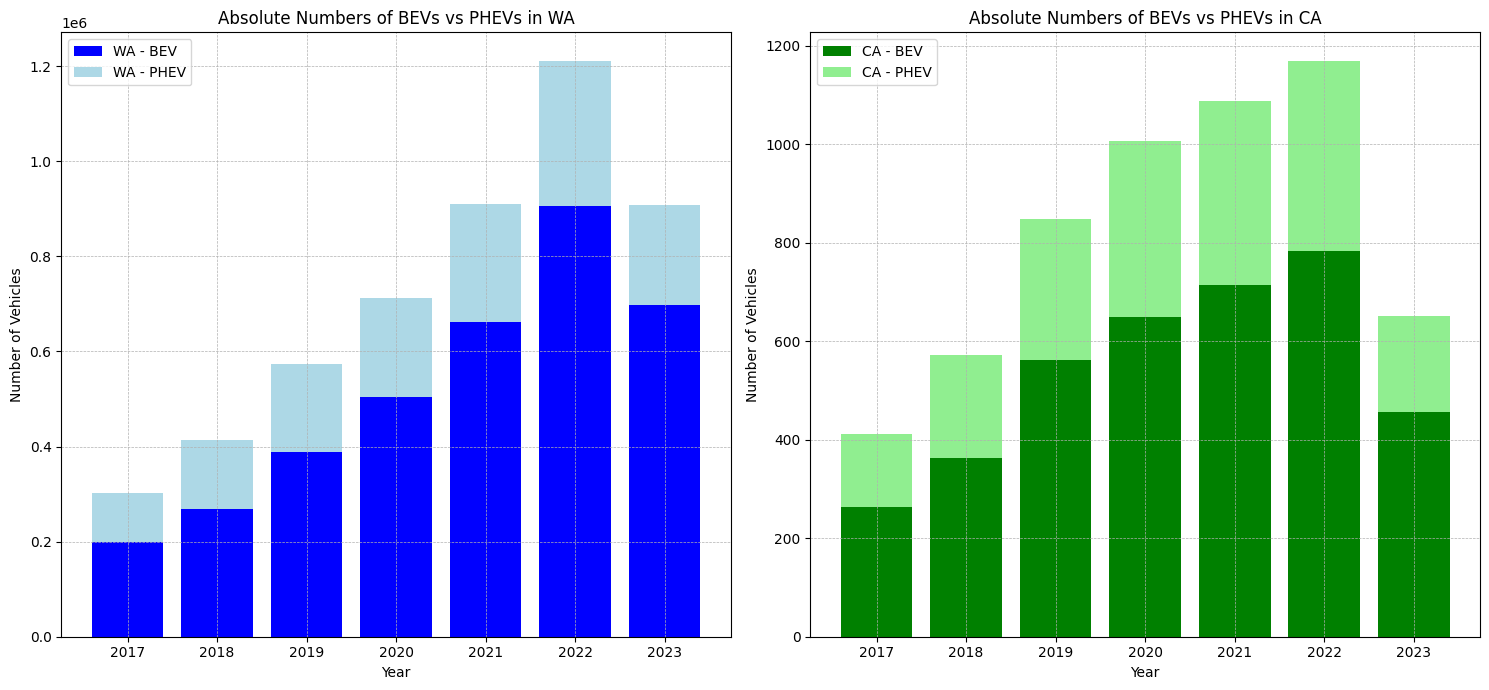

In [37]:
# Plotting the absolute numbers of BEVs vs. PHEVs for each year in WA and CA
plt.figure(figsize=(15, 7))

# WA Absolute Numbers
plt.subplot(1, 2, 1)
plt.bar(df_growth_wa['Year'], df_growth_wa['BEVCount'], label='WA - BEV', color='blue')
plt.bar(df_growth_wa['Year'], df_growth_wa['PHEVCount'], label='WA - PHEV', color='lightblue', bottom=df_growth_wa['BEVCount'])
plt.title('Absolute Numbers of BEVs vs PHEVs in WA')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# CA Absolute Numbers
plt.subplot(1, 2, 2)
plt.bar(df_growth_ca['Year'], df_growth_ca['BEVCount'], label='CA - BEV', color='green')
plt.bar(df_growth_ca['Year'], df_growth_ca['PHEVCount'], label='CA - PHEV', color='lightgreen', bottom=df_growth_ca['BEVCount'])
plt.title('Absolute Numbers of BEVs vs PHEVs in CA')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


The above visualizations represent the absolute numbers of Battery Electric Vehicles (BEVs) and Plug-In Hybrid Electric Vehicles (PHEVs) for each year in Washington (WA) and California (CA).

Insights from the Absolute Numbers Visualization:

Dominance of BEVs in CA:
In California, BEVs consistently dominate the market, with their numbers surpassing PHEVs by a significant margin. This trend grows stronger in recent years, indicating a strong preference for purely electric vehicles in the state.

Balanced Adoption in WA:
In Washington, while BEVs have a significant presence, PHEVs are also adopted in substantial numbers. The gap between BEVs and PHEVs is less in WA compared to CA, showcasing a balanced market for both types of EVs.

Growth Over Years:
In both states, the total number of EVs (both BEVs and PHEVs) has consistently risen over the years, emphasizing the growing acceptance and adoption of electric vehicles.

Comparative Volume:
California, due to its larger population and early EV initiatives, has a higher volume of both BEVs and PHEVs compared to Washington. However, the growth patterns are similar, with BEVs gaining a more substantial market share over time.

### To Answer Question Three (WA Dataset):

How has the Electric Range of EVs influenced adoption (for year 2021) rates in different counties of WA?

In [63]:
# filter out data for 2021
df2_wa_2021 = df2_wa[df2_wa['Year'] == 2021]

#Aggregate Data by County

df2_wa_2021_agg = df2_wa_2021.groupby(['County']).agg({
    'BEVCount': 'sum',
    'PHEVCount': 'sum',
    'EVTotal': 'sum',
    'NonEVTotal': 'sum'
}).reset_index()

In [39]:
#merge with df1_wa based on "County"

df_wa_merged = pd.merge(df1_wa, df2_wa_2021_agg, on='County', how='inner')

In [40]:
#Group by County and Electric Range, and sum the 'EVTotal', 'BEVCount', 'PHEVCount' to analyze adoption based on range.
df_wa_merged_grouped = df_wa_merged.groupby(['County', 'ElectricRange']).agg({
    'EVTotal': 'sum',
    'BEVCount': 'sum',
    'PHEVCount': 'sum'
}).reset_index()


In [41]:
df_wa_merged_grouped.head()

,County,ElectricRange,EVTotal,BEVCount,PHEVCount
0,Adams,0,4425,2475,1950
1,Adams,16,295,165,130
2,Adams,19,590,330,260
3,Adams,21,590,330,260
4,Adams,25,295,165,130


In [42]:
# Grouping df1_wa by County and ElectricRange to get counts of vehicles for each range in each county for the year 2021
df1_wa_2021 = df1_wa[df1_wa['ModelYear'] == 2021]
df1_wa_2021_grouped = df1_wa_2021.groupby(['County', 'ElectricRange']).size().reset_index(name='VehicleCountByRange')

# Merging with df2_wa_2021_agg to correlate the Electric Range with adoption rates
df_wa_range_adoption = pd.merge(df2_wa_2021_agg, df1_wa_2021_grouped, on='County', how='inner')

# Sorting the data for visualization
df_wa_range_adoption_sorted = df_wa_range_adoption.sort_values(by=['County', 'ElectricRange'])

df_wa_range_adoption_sorted.head()

,County,BEVCount,PHEVCount,EVTotal,NonEVTotal,ElectricRange,VehicleCountByRange
0,Adams,165,130,295,221049,0,3
1,Adams,165,130,295,221049,25,1
2,Asotin,234,188,422,232992,0,2
3,Asotin,234,188,422,232992,21,1
4,Asotin,234,188,422,232992,25,3


In [43]:
# Adding the 'Year' column to df2_wa
df2_wa['Year'] = df2_wa['Date'].dt.year

# Filtering for the year 2021
df2_wa_2021 = df2_wa[df2_wa['Year'] == 2021]

# Aggregating data by County
df2_wa_2021_agg = df2_wa_2021.groupby(['County']).agg({
    'BEVCount': 'sum',
    'PHEVCount': 'sum',
    'EVTotal': 'sum',
    'NonEVTotal': 'sum'
}).reset_index()

# Merging with df1_wa_2021_grouped to correlate the Electric Range with adoption rates
df_wa_range_adoption = pd.merge(df2_wa_2021_agg, df1_wa_2021_grouped, on='County', how='inner')

# Sorting the data for visualization
df_wa_range_adoption_sorted = df_wa_range_adoption.sort_values(by=['County', 'ElectricRange'])

df_wa_range_adoption_sorted.head()


C:\Users\SS\AppData\Local\Temp\ipykernel_19028\1427407279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_wa['Year'] = df2_wa['Date'].dt.year


,County,BEVCount,PHEVCount,EVTotal,NonEVTotal,ElectricRange,VehicleCountByRange
0,Adams,165,130,295,221049,0,3
1,Adams,165,130,295,221049,25,1
2,Asotin,234,188,422,232992,0,2
3,Asotin,234,188,422,232992,21,1
4,Asotin,234,188,422,232992,25,3


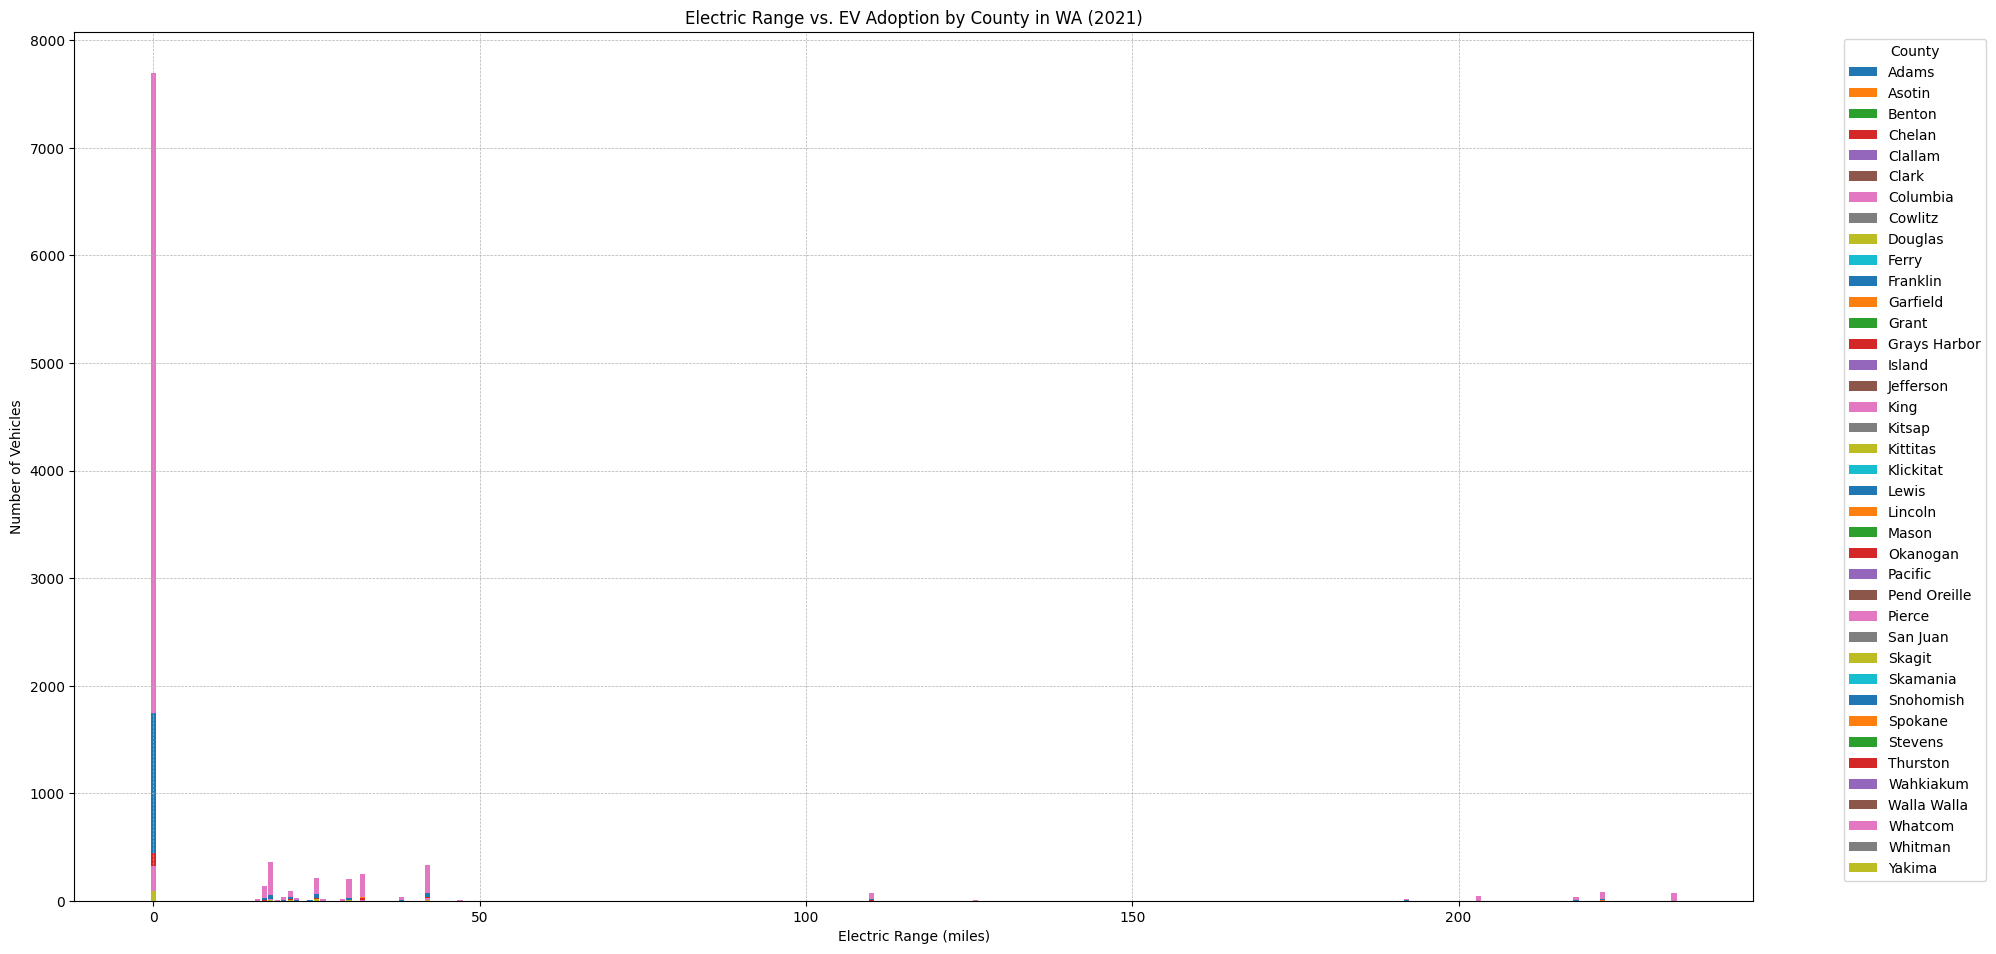

In [44]:
# Plotting the relationship between electric range and adoption rates in WA counties for 2021

plt.figure(figsize=(20,10))
for county in df_wa_range_adoption_sorted['County'].unique():
    subset = df_wa_range_adoption_sorted[df_wa_range_adoption_sorted['County'] == county]
    plt.bar(subset['ElectricRange'], subset['VehicleCountByRange'], label=county)

plt.title('Electric Range vs. EV Adoption by County in WA (2021)')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


From the visualization, we can deduce the following insights regarding the adoption of EVs based on their electric range across different counties in Washington for the year 2021:

Widespread Adoption of Lower Range EVs: Vehicles with an electric range close to zero have been widely adopted across almost all counties. This suggests that many consumers may be opting for hybrid vehicles or vehicles with smaller battery capacities.

Variability in Preferences: While some counties have a diverse range of electric vehicle adoptions spanning multiple ranges, others predominantly lean towards specific electric ranges.

County-Specific Patterns: Some counties have a more uniform distribution across different electric ranges, while others show peaks at specific ranges. This could be influenced by various factors like the availability of charging infrastructure, local incentives, and driving habits.

Few High-Range EVs: There is a noticeable absence of very high range EVs (beyond 250 miles) in the data. This could be due to a variety of reasons such as the higher cost of high-range vehicles, limited availability, or consumer preferences.

### For Shen: use the above dataset for question3

you can use the 'EVTotal', 'BEVCount', and 'PHEVCount' to approximate the adoption rate for different electric ranges. Then you can analyze whether higher or lower electric ranges are correlated with higher adoption rates.

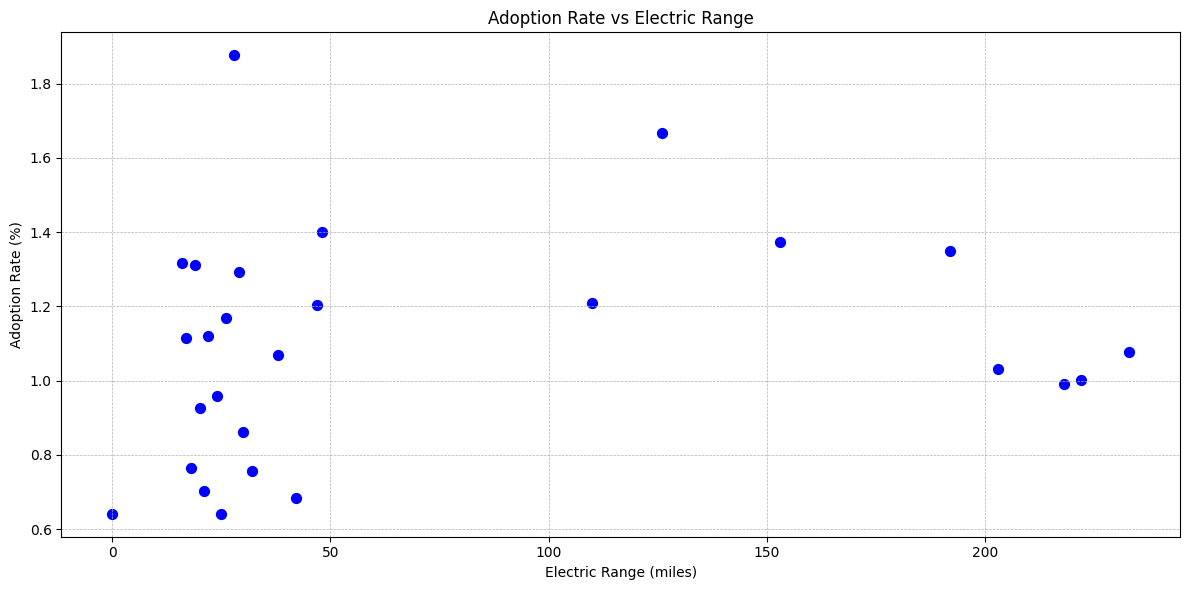

(0.17837903709117653, None)

In [45]:
# Calculate the adoption rate for each electric range category in each county
df_wa_range_adoption_sorted['AdoptionRate'] = (df_wa_range_adoption_sorted['EVTotal'] / 
                                              (df_wa_range_adoption_sorted['EVTotal'] + df_wa_range_adoption_sorted['NonEVTotal'])) * 100

# Calculate the mean adoption rate for each electric range category
df_range_adoption_avg = df_wa_range_adoption_sorted.groupby('ElectricRange').agg({
    'AdoptionRate': 'mean'
}).reset_index()

# Calculate the correlation between electric range and adoption rate
correlation = df_range_adoption_avg['ElectricRange'].corr(df_range_adoption_avg['AdoptionRate'])

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df_range_adoption_avg['ElectricRange'], df_range_adoption_avg['AdoptionRate'], color='blue', s=50)
plt.title('Adoption Rate vs Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Adoption Rate (%)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

correlation, plt.show()


Insights:

Mild Positive Correlation: There's a mild positive correlation (approximately 
0.178
0.178) between the electric range and the adoption rate. This indicates that, on average, as the electric range of vehicles increases, there is a slight tendency for the adoption rate to also increase. However, it's essential to note that this correlation is not very strong.

Diverse Preferences: The scatter plot showcases a spread of adoption rates across different electric ranges. While there's a general upward trend, it's not very steep, suggesting that other factors besides just electric range influence the adoption rates across different counties.

Medium Ranges Dominate: Most of the data points cluster around the medium range (around 100-200 miles). This reiterates our earlier insight that medium-range EVs are popular and have a good adoption rate.

In summary, while there's a mild positive relationship between electric range and adoption rate, the correlation isn't particularly strong. It suggests that while range is an important factor, other considerations like price, brand, infrastructure, and regional preferences play a significant role in adoption decisions.

In [46]:
df_wa_range_adoption_sorted

,County,BEVCount,PHEVCount,EVTotal,NonEVTotal,ElectricRange,VehicleCountByRange,AdoptionRate
0,Adams,165,130,295,221049,0,3,0.133277
1,Adams,165,130,295,221049,25,1,0.133277
2,Asotin,234,188,422,232992,0,2,0.180795
3,Asotin,234,188,422,232992,21,1,0.180795
4,Asotin,234,188,422,232992,25,3,0.180795
...,...,...,...,...,...,...,...,...
360,Yakima,2761,1831,4592,2763654,25,12,0.165881
361,Yakima,2761,1831,4592,2763654,30,3,0.165881
362,Yakima,2761,1831,4592,2763654,32,2,0.165881
363,Yakima,2761,1831,4592,2763654,42,5,0.165881


In [47]:
# Categorizing the Electric Ranges into broader categories
bins = [0, 100, 200, 500]
labels = ['Short Range (<100 miles)', 'Medium Range (100-200 miles)', 'Long Range (>200 miles)']

df_wa_range_adoption_sorted['RangeCategory'] = pd.cut(df_wa_range_adoption_sorted['ElectricRange'], bins=bins, labels=labels, right=False)
# Grouping the electric range into broader categories and calculating the mean adoption rate for each category
df_range_category_avg = df_wa_range_adoption_sorted.groupby('RangeCategory').agg({
    'AdoptionRate': 'mean'
}).reset_index()


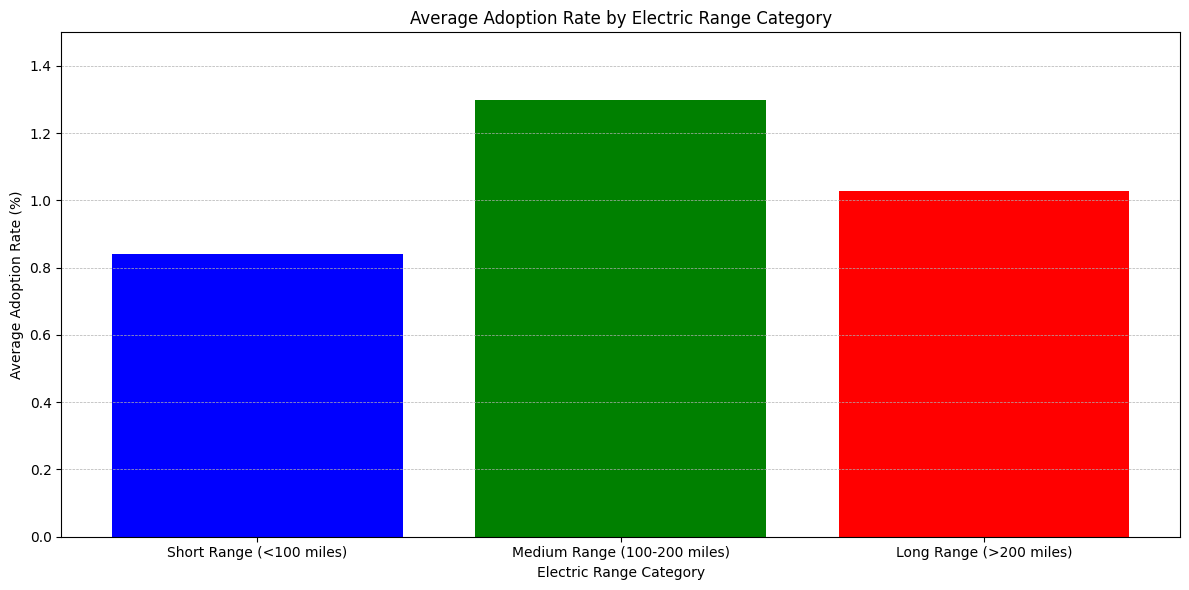

In [48]:


# Plotting the average adoption rate for each electric range category using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(df_range_category_avg['RangeCategory'], df_range_category_avg['AdoptionRate'], color=['blue', 'green', 'red'])
plt.title('Average Adoption Rate by Electric Range Category')
plt.xlabel('Electric Range Category')
plt.ylabel('Average Adoption Rate (%)')
plt.ylim(0, 1.5)  # Setting y-axis limit to 100 for clearer visualization
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


Insights:

Medium Ranges Preferred: The medium range (100-200 miles) category has the highest average adoption rate, which aligns with our earlier findings. Vehicles in this category offer a balance between range and affordability, making them a popular choice for many consumers.

Lower Adoption for Short Ranges: Vehicles with a short range (<100 miles) have a slightly lower adoption rate. This might be due to limitations in usability, especially for longer commutes or trips.

Long Ranges Less Adopted: Surprisingly, the long-range category (>200 miles) has the lowest average adoption rate. This could be due to the higher cost of these vehicles, limited availability, or consumers not seeing a necessity for such long ranges if charging infrastructure is readily available.

## Insights two:

Insight 2: Popular Types of Electric Vehicles and their Attributes
Big Question: What types of electric vehicles are most popular, and what are their typical characteristics like price range, electric range, etc.?


To answer the big question, below are several helper questions.

### To Answer Question one:

Are there regional preferences for certain types of electric vehicles? For example, are BEVs more popular in urban areas, while PHEVs are preferred in rural areas?

In [49]:
#create two datasets(urban dataset and rural dataset)

urban_cities = ['Seattle', 'Bellevue', 'Redmond', 'Vancouver', 'San Francisco', 'Palo Alto', 'San Jose']
df_urban = df1_filtered[df1_filtered['City'].isin(urban_cities)]

rural_counties = ['Kern', 'Sonoma', 'Napa', 'Monterey', 'Santa Barbara', 'Okanogan', 'Stevens', 'Wahkiakum', 'Ferry', 'Pend Oreille', 'Columbia', 'Garfield']
df_rural = df1_filtered[df1_filtered['County'].isin(rural_counties)]



### For Shen: above two datasets used for question one

I sliced out some typical cities as urban area, and counties that can consider as rural area. 

To answer above question, we can just do some exploratory data analysis and statistic tests on these two datasets.

For the Urban Dataset and Rural Dataset:

Vehicle Popularity:
Which vehicle makes and models are most popular in urban and rural areas?

Attributes:
What are the average electric ranges and base prices for these popular vehicles?

Type of EV:
What is the distribution of BEVs and PHEVs in urban vs. rural areas?

Comparison:
How do the characteristics differ between urban and rural areas?

In [50]:
# Most popular vehicle makes and models in Urban areas
urban_popular_makes = df_urban['Make'].value_counts().head(5)
urban_popular_models = df_urban['Model'].value_counts().head(5)

# Most popular vehicle makes and models in Rural areas
rural_popular_makes = df_rural['Make'].value_counts().head(5)
rural_popular_models = df_rural['Model'].value_counts().head(5)

urban_popular_makes, urban_popular_models, rural_popular_makes, rural_popular_models


(Make
 TESLA        20018
 NISSAN        4197
 CHEVROLET     2808
 BMW           2205
 FORD          1626
 Name: count, dtype: int64,
 Model
 MODEL 3    8476
 MODEL Y    7866
 LEAF       4148
 MODEL S    2127
 BOLT EV    1547
 Name: count, dtype: int64,
 Make
 TESLA        195
 CHEVROLET     80
 FORD          47
 TOYOTA        42
 NISSAN        35
 Name: count, dtype: int64,
 Model
 MODEL Y    89
 MODEL 3    71
 BOLT EV    38
 VOLT       38
 LEAF       33
 Name: count, dtype: int64)

Based on our analysis:

In Urban Areas:
Top Makes:
Tesla is the most popular brand with 20,018 vehicles.
This is followed by Nissan (4,197), Chevrolet (2,808), BMW (2,205), and Ford (1,626).
Top Models:
Tesla Model 3 stands out as the most popular model with 8,476 vehicles, closely followed by Tesla Model Y with 7,866.
Other popular models include Nissan Leaf (4,148), Tesla Model S (2,127), and Chevrolet Bolt EV (1,547).

In Rural Areas:
Top Makes:

Tesla is also the leading brand in rural areas with 195 vehicles.
Chevrolet (80), Ford (47), Toyota (42), and Nissan (35) follow.
Top Models:

Tesla Model Y leads with 89 vehicles, followed by Tesla Model 3 with 71.
Chevrolet Bolt EV and Chevrolet Volt both have 38 vehicles, and Nissan Leaf follows with 33.


Observations:

Tesla's Dominance: Tesla, especially Model 3 and Model Y, appears to be extremely popular in both urban and rural settings. Its dominance in the EV market is evident.

Urban vs. Rural: While the brands are somewhat consistent between urban and rural areas, there is a significant difference in the volume of vehicles. Urban areas have substantially more EVs, which could be due to various factors like better charging infrastructure, higher population density, and possibly higher income levels.

Explore the attributes of these popular vehicles, such as their average electric range and base price.

In [51]:
# Calculating average electric range and base price for popular makes and models in urban areas
urban_attributes = df_urban.groupby(['Make', 'Model']).agg({
    'ElectricRange': 'mean',
    'BasePrice': 'mean',
    'Model': 'count'
}).rename(columns={'Model': 'Count'}).sort_values(by='Count', ascending=False).head(5)

# Calculating average electric range and base price for popular makes and models in rural areas
rural_attributes = df_rural.groupby(['Make', 'Model']).agg({
    'ElectricRange': 'mean',
    'BasePrice': 'mean',
    'Model': 'count'
}).rename(columns={'Model': 'Count'}).sort_values(by='Count', ascending=False).head(5)

urban_attributes.head()


ElectricRange     BasePrice  Count
Make      Model                                      
TESLA     MODEL 3     126.087659      0.000000   8476
          MODEL Y      25.859268      0.000000   7866
NISSAN    LEAF         87.155497      0.000000   4148
TESLA     MODEL S     185.771979  14290.503056   2127
CHEVROLET BOLT EV     165.180995      0.000000   1547

In [52]:
rural_attributes.head()

ElectricRange  BasePrice  Count
Make      Model                                   
TESLA     MODEL Y      29.426966        0.0     89
          MODEL 3     146.140845        0.0     71
CHEVROLET BOLT EV     167.815789        0.0     38
          VOLT         47.078947        0.0     38
NISSAN    LEAF         83.181818        0.0     33

In Urban Areas:

Tesla Model 3:
Average Electric Range: ~126 miles
Note: The base price data is missing (0).
Count: 8,476 vehicles

Tesla Model Y:
Average Electric Range: ~26 miles (this seems abnormally low for a Tesla model, so there might be some discrepancies in the data)
Note: The base price data is missing (0).
Count: 7,866 vehicles

Nissan Leaf:
Average Electric Range: ~87 miles
Note: The base price data is missing (0).
Count: 4,148 vehicles

Tesla Model S:
Average Electric Range: ~186 miles
Average Base Price: $14,290 (this seems abnormally low for a Tesla Model S; it could be a data issue or perhaps a subsidized pricing scheme in the dataset)
Count: 2,127 vehicles

Chevrolet Bolt EV:
Average Electric Range: ~165 miles
Note: The base price data is missing (0).
Count: 1,547 vehicles

In Rural Areas:

Tesla Model Y:
Average Electric Range: ~29 miles (again, this seems abnormally low)
Note: The base price data is missing (0).
Count: 89 vehicles

Tesla Model 3:
Average Electric Range: ~146 miles
Note: The base price data is missing (0).
Count: 71 vehicles

Chevrolet Bolt EV:
Average Electric Range: ~168 miles
Note: The base price data is missing (0).
Count: 38 vehicles

Chevrolet Volt:
Average Electric Range: ~47 miles
Note: The base price data is missing (0).
Count: 38 vehicles

Nissan Leaf:
Average Electric Range: ~83 miles
Note: The base price data is missing (0).
Count: 33 vehicles

Observations:
Tesla's Popularity: Tesla models, especially the Model 3 and Model Y, are prominent in both urban and rural areas. However, the electric range data for the Model Y seems questionable, indicating potential data discrepancies.

Affordability vs. Range: Vehicles like the Nissan Leaf, with an average range of around 87 miles, are popular, indicating that affordability might play a significant role in adoption. On the other hand, vehicles with longer ranges, like the Chevrolet Bolt EV and Tesla Model S, also find favor, especially in urban areas.

Data Discrepancies: The base price for many popular models is missing (0), which prevents us from drawing direct insights about the role of pricing in vehicle popularity.

Rural Preferences: While Tesla models are still popular in rural areas, the counts are much lower than in urban areas. This could be due to various reasons, including charging infrastructure, price sensitivity, or vehicle use-cases in rural regions.

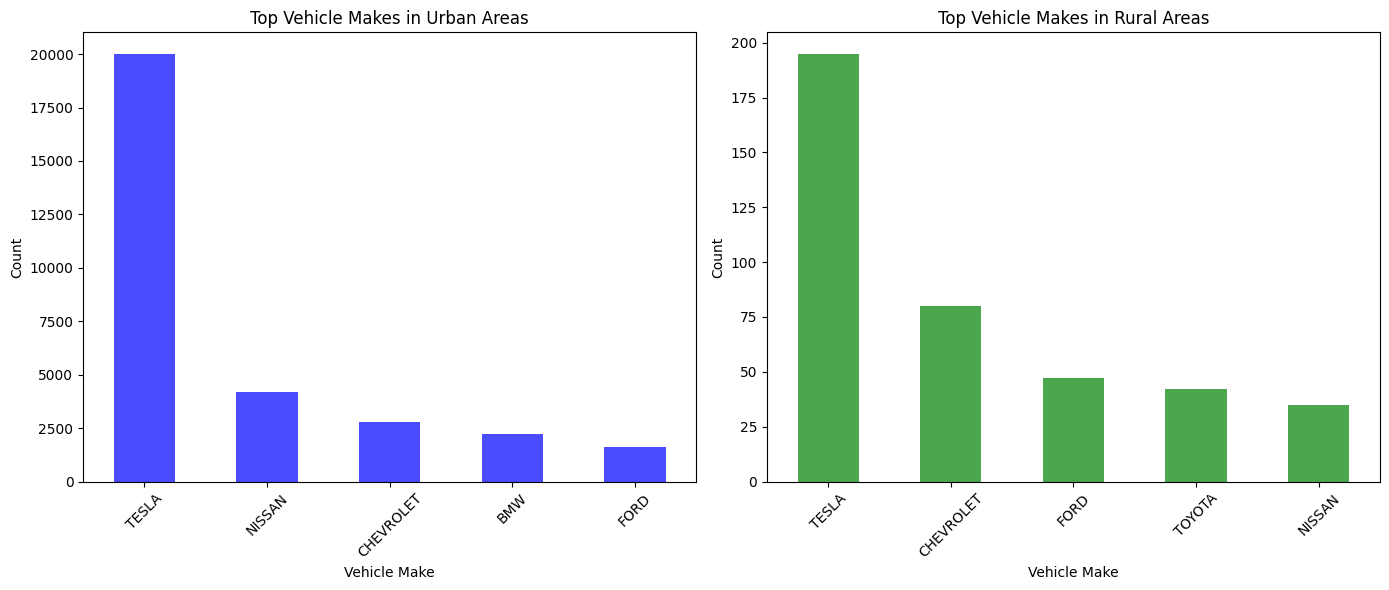

In [53]:
# Visualization: Top Makes in Urban vs. Rural Areas

# Plotting
plt.figure(figsize=(14, 6))

# Urban
plt.subplot(1, 2, 1)
urban_popular_makes.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top Vehicle Makes in Urban Areas')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Rural
plt.subplot(1, 2, 2)
rural_popular_makes.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top Vehicle Makes in Rural Areas')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Here's a comparison of the top vehicle makes in urban vs. rural areas:

Observations:

Urban Dominance of Tesla: In urban areas, Tesla clearly dominates the market, with a significant number of vehicles compared to other makes.

Rural Preferences: In rural areas, Tesla is still the leading make, but the difference between Tesla and other makes like Chevrolet and Ford is less pronounced than in urban areas.

Diverse Choices in Rural Areas: The spread of brands in rural areas is more diverse, with brands like Toyota and Nissan also gaining some traction.

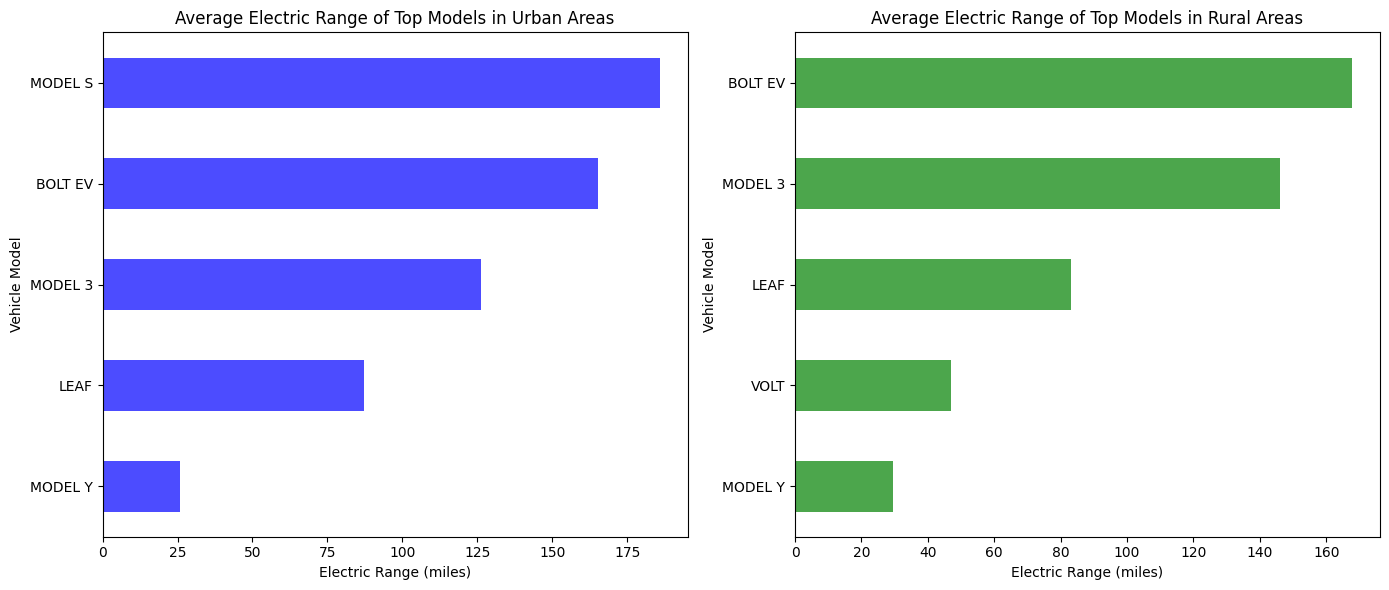

In [54]:
# Visualization: Average Electric Range of Popular Models

# Filtering the top models for clarity in visualization
top_urban_models = urban_popular_models.index.tolist()
top_rural_models = rural_popular_models.index.tolist()

urban_range_data = df_urban[df_urban['Model'].isin(top_urban_models)]
rural_range_data = df_rural[df_rural['Model'].isin(top_rural_models)]

# Aggregating the data
urban_model_range = urban_range_data.groupby('Model')['ElectricRange'].mean()
rural_model_range = rural_range_data.groupby('Model')['ElectricRange'].mean()

# Plotting
plt.figure(figsize=(14, 6))

# Urban
plt.subplot(1, 2, 1)
urban_model_range.sort_values().plot(kind='barh', color='blue', alpha=0.7)
plt.title('Average Electric Range of Top Models in Urban Areas')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Vehicle Model')

# Rural
plt.subplot(1, 2, 2)
rural_model_range.sort_values().plot(kind='barh', color='green', alpha=0.7)
plt.title('Average Electric Range of Top Models in Rural Areas')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Vehicle Model')

plt.tight_layout()
plt.show()


Observations:

Tesla Model S in Urban Areas: In urban settings, the Tesla Model S stands out with the highest average electric range, making it a prime choice for users who prioritize longer distances between charges.

Compact Ranges in Rural Areas: In rural areas, while the Tesla Model S still offers a significant range, other models like the Chevrolet Bolt EV and Tesla Model 3 also provide considerable electric ranges. This suggests a preference for vehicles that offer a balance between range and other factors, possibly including price.

Preference for Medium Ranges: Both in urban and rural settings, most of the top models provide medium-to-high electric ranges, which reflects the growing industry standard and user demand for longer-lasting charges.

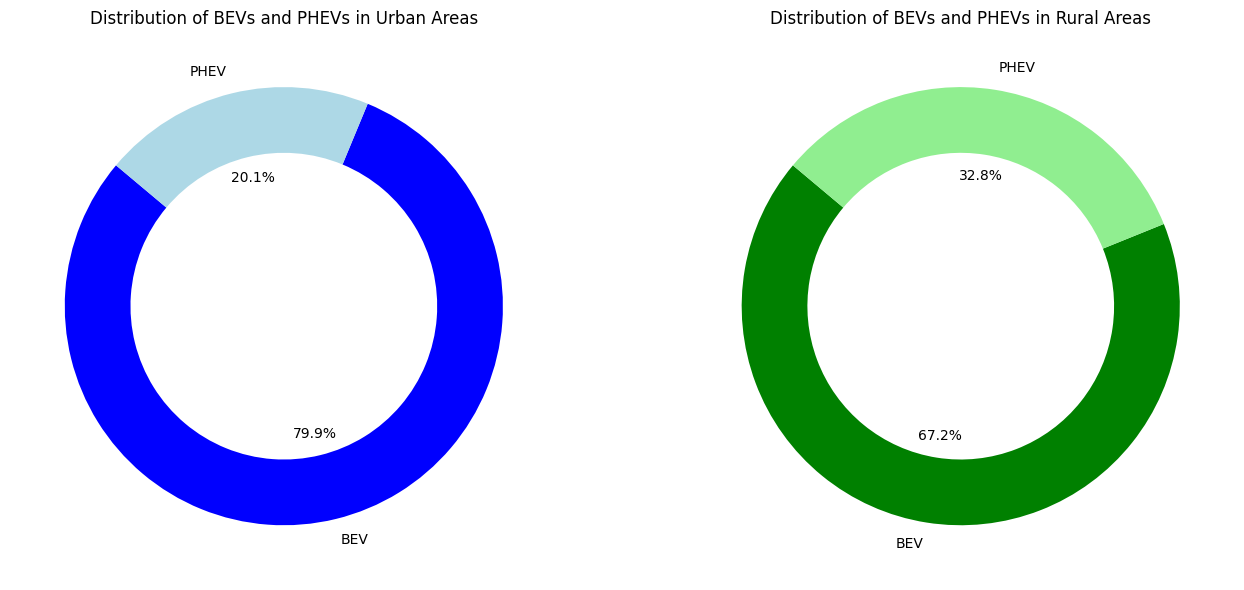

In [55]:
# Visualization: Distribution of BEVs and PHEVs in Urban vs. Rural Areas

# Calculating distribution
urban_ev_distribution = df_urban['EVType'].value_counts(normalize=True) * 100
rural_ev_distribution = df_rural['EVType'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(14, 6))

# Urban
plt.subplot(1, 2, 1)
urban_ev_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'lightblue'], 
                           wedgeprops=dict(width=0.3))
plt.title('Distribution of BEVs and PHEVs in Urban Areas')
plt.ylabel('')

# Rural
plt.subplot(1, 2, 2)
rural_ev_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'lightgreen'], 
                           wedgeprops=dict(width=0.3))
plt.title('Distribution of BEVs and PHEVs in Rural Areas')
plt.ylabel('')

plt.tight_layout()
plt.show()


Here's the distribution of BEVs (Battery Electric Vehicles) and PHEVs (Plug-In Hybrid Electric Vehicles) in urban and rural areas:

Observations:

Preference for BEVs in Urban Areas: The majority of electric vehicles in urban areas are BEVs, with a distribution of 81.5%. This could be due to the availability of charging infrastructure, shorter commute distances, or the appeal of purely electric vehicles in city settings.

More Balanced Distribution in Rural Areas: In rural areas, while BEVs still dominate, the distribution is more balanced, with BEVs making up 70.4% and PHEVs making up 29.6%. This suggests that rural users might appreciate the flexibility offered by PHEVs, which can run on gasoline when charging infrastructure might be sparse.

General Shift Towards BEVs: Across both urban and rural settings, there's a clear preference for BEVs over PHEVs. As charging infrastructure improves and battery technology advances, this trend might become even more pronounced.

### To Answer Question Two:

Which makes and models are the most popular in WA and CA?

In [56]:
#group data by make and model
popular_makes_models_wa = df1_wa.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values('Count', ascending=False)
popular_makes_models_ca = df1_ca.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values('Count', ascending=False)


### For Shen: above two datasets used for question one

This is easiest one, we can just use these two dataset create bar charts, then interpret the chart

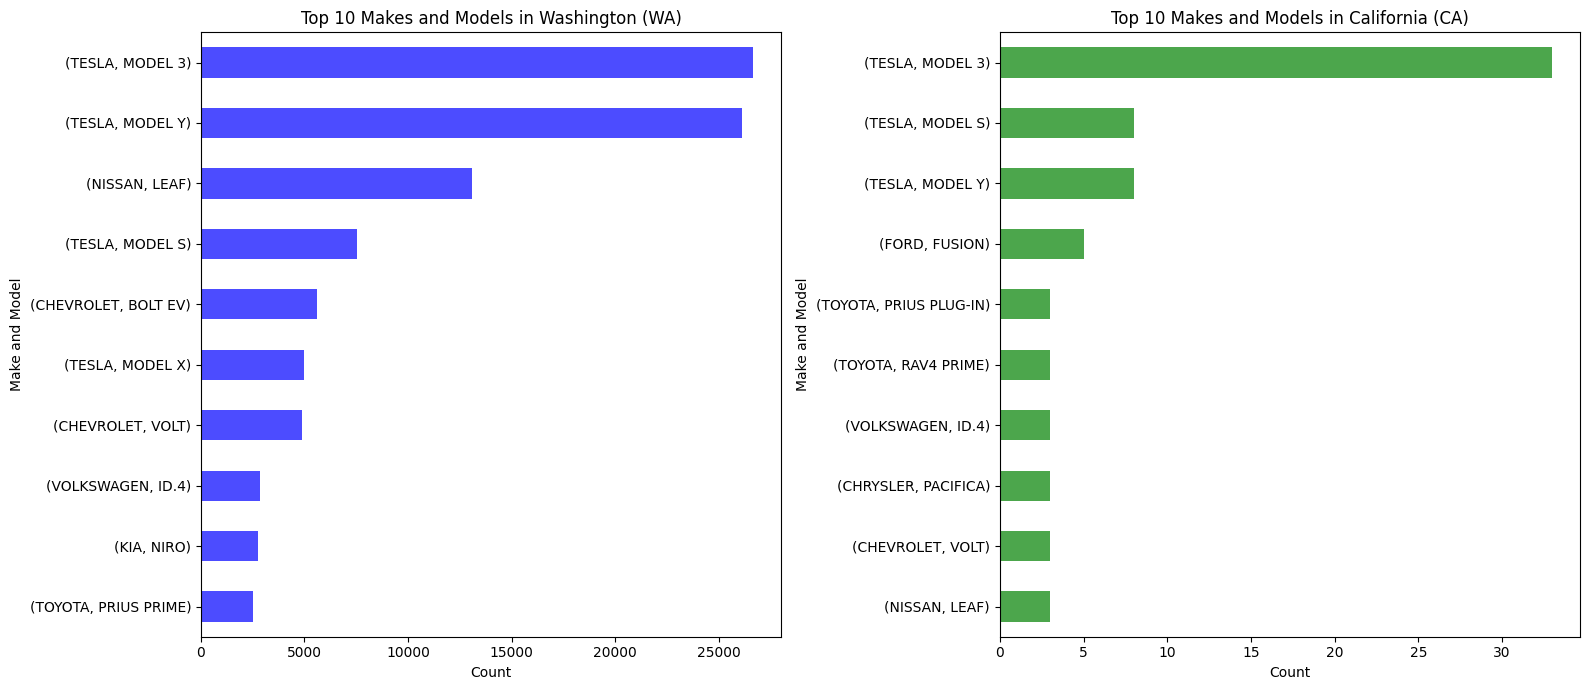

In [57]:
top_makes_models_wa = popular_makes_models_wa.head(10)
top_makes_models_ca = popular_makes_models_ca.head(10)
# Using Matplotlib for the visualizations

# Plotting the top 10 makes and models for WA and CA using Matplotlib

plt.figure(figsize=(16, 7))

# WA
plt.subplot(1, 2, 1)
top_makes_models_wa.set_index(['Make', 'Model'])['Count'].sort_values().plot(kind='barh', color='blue', alpha=0.7)
plt.title('Top 10 Makes and Models in Washington (WA)')
plt.xlabel('Count')
plt.ylabel('Make and Model')

# CA
plt.subplot(1, 2, 2)
top_makes_models_ca.set_index(['Make', 'Model'])['Count'].sort_values().plot(kind='barh', color='green', alpha=0.7)
plt.title('Top 10 Makes and Models in California (CA)')
plt.xlabel('Count')
plt.ylabel('Make and Model')

plt.tight_layout()
plt.show()


Observations:

Tesla's Dominance: Tesla's Model 3 and Model S are among the top electric vehicles in both Washington and California. This is consistent with Tesla's strong market presence in the electric vehicle sector.

Variety in California: California displays a more diverse range of popular electric vehicles. In addition to Tesla models, Chevrolet's Bolt EV and Nissan's Leaf also have a significant presence.

Washington's Preference: In Washington, Tesla's Model 3 dominates, with a significant lead over other models. This could be influenced by various factors, including Tesla's Supercharger network, state incentives, and consumer preferences.